<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-overview" data-toc-modified-id="Data-overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data overview</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preprocessing</a></span></li></ul></li><li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem research</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression-model-(no-balancing)" data-toc-modified-id="Logistic-regression-model-(no-balancing)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic regression model (no balancing)</a></span></li><li><span><a href="#Random-forest-model-(no-balancing)" data-toc-modified-id="Random-forest-model-(no-balancing)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random forest model (no balancing)</a></span></li></ul></li><li><span><a href="#Fighting-imbalance-(Class-balancing-method-via-the-class_weight-parameter)" data-toc-modified-id="Fighting-imbalance-(Class-balancing-method-via-the-class_weight-parameter)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting imbalance (Class balancing method via the class_weight parameter)</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#Random-forest-model" data-toc-modified-id="Random-forest-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random forest model</a></span></li></ul></li><li><span><a href="#Class-balancing-method-through-upsampling" data-toc-modified-id="Class-balancing-method-through-upsampling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Class balancing method through upsampling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#Random-forest-model" data-toc-modified-id="Random-forest-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random forest model</a></span></li></ul></li><li><span><a href="#Class-balancing-method-through-downsampling" data-toc-modified-id="Class-balancing-method-through-downsampling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Class balancing method through downsampling</a></span><ul class="toc-item"><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Random-Forest-Model-with-GridSearchCV" data-toc-modified-id="Random-Forest-Model-with-GridSearchCV-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest Model with GridSearchCV</a></span></li><li><span><a href="#Random-Forest-Model-with-RandomizedSearchCV" data-toc-modified-id="Random-Forest-Model-with-RandomizedSearchCV-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Random Forest Model with RandomizedSearchCV</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model testing</a></span></li></ul></div>

# Bank customer churn

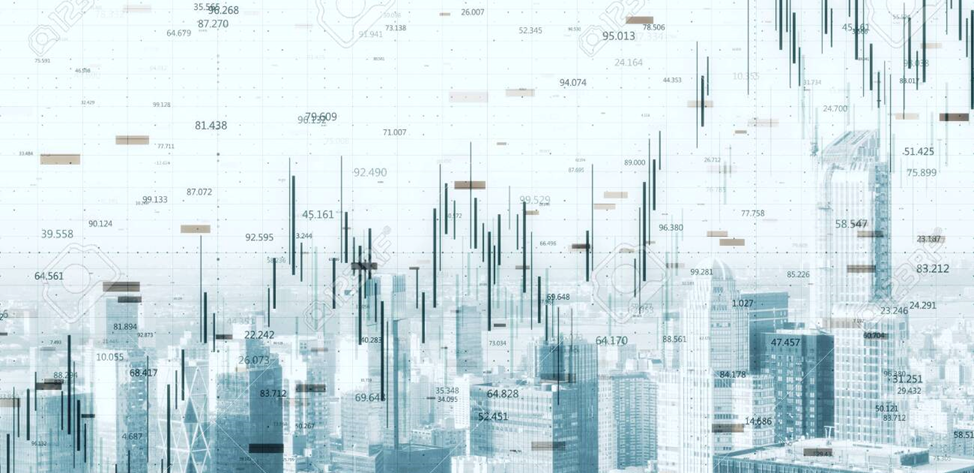

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Task of the project:**

Predict whether the client will leave the bank in the near future or not (based on historical data on customer behavior and termination of agreements with the bank).

**Objective of the project:**

Build a model with an extremely large F1-measure


## Data preprocessing

### Data overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from numpy import math

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
clients_churn = pd.read_csv(r"C:\Users\Vadim\Documents\Datasets\Churn.csv")

In [5]:
display(clients_churn.info())
display(clients_churn.describe())
display(clients_churn.head(5))
display(clients_churn.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


False    10000
dtype: int64

### Data preprocessing

In [6]:
clients_churn.columns = clients_churn.columns.str.lower()
clients_churn = clients_churn.rename(columns = {
    'rownumber' : 'row_number', 'customerid' : 'customer_id', 'creditscore' : 'credit_score', 
    'numofproducts' : 'num_of_products', 'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member', 
    'estimatedsalary' : 'estimated_salary'}) 

In [7]:
clients_churn.head(5)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [8]:
clients_churn['geography'].unique() 

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
clients_churn['gender'].unique() 

array(['Female', 'Male'], dtype=object)

**Fill in the gaps with a logistic regression model**

In [16]:
data_reg = clients_churn.dropna()

In [17]:
data_reg = data_reg.drop(['row_number', 'surname', 'customer_id'], axis=1)   # these columns do not carry useful information for the algorithm, 
# therefore they can be excluded from the dataframe

In [18]:
data_reg = pd.get_dummies(data_reg, drop_first=True) 

In [19]:
data_reg.head(5) 

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
features = data_reg.drop(['tenure'], axis=1) 
target = data_reg['tenure']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) 

In [21]:
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 
           'has_cr_card', 'is_active_member', 'estimated_salary'] 

scaler = StandardScaler()
features_train.loc[:, numeric] = scaler.fit_transform(features_train.loc[:, numeric]) 
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])

Предсказания на тренировочной выборке

In [45]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid) 
print('Accuracy модели логистической регрессии на валидационной выборке:', model.score(features_valid, target_valid))
print('f1-мера:',np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1_micro')))

Accuracy модели логистической регрессии на валидационной выборке: 0.07831060272767268
f1-мера: 0.7059051959737299


Let's try a random forest model. First, determine the optimal depth

In [48]:
%%time
best_model = None
best_accuracy = 0
best_depth = 0
best_f1 = 0
for depth in range(1, 100, 10):
   model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345, class_weight='balanced')
  # задаем количество деревьев
   model.fit(features_train, target_train) 
   predictions_valid = model.predict(features_valid) 
   accuracy_result = model.score(features_valid, target_valid) 
   f1 = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring='f1_weighted'))
   if f1 >  best_f1:
       best_model = model 
       best_accuracy = accuracy_result 
       best_depth = depth 
       best_f1 = f1
print("Depth of the best model:", best_depth)              
print("Accuracy of the best model:", best_accuracy)
print("F1 of the best model:", best_f1)

Depth of the best model: 21
Accuracy of the best model: 0.09414870215574131
F1 of the best model: 0.09731513803431034
Wall time: 8.87 s


Selection of the optimal number of trees:

In [49]:
%%time
best_model = None
best_accuracy = 0
best_estimators = 0
best_f1 = 0
for n in range(1, 100, 10):
   model = RandomForestClassifier(n_estimators=n, max_depth= 21, random_state=12345)
   model.fit(features_train, target_train) 
   predictions_valid = model.predict(features_valid) 
   accuracy_result = model.score(features_valid, target_valid) 
   f1 = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1_weighted'))
   if f1 > best_f1:
       best_model = model
       best_accuracy = accuracy_result
       best_estimators = n  
       best_f1 = f1
print("Number of trees:", best_estimators)              
print("Accuracy of the best model:", best_accuracy)
print("F1 of the best model:", best_f1)

Number of trees: 61
Accuracy of the best model: 0.10162780466344039
F1 of the best model: 0.8451321107518703
Wall time: 12.6 s


In [50]:
target_valid.value_counts().sort_index()   # the number of values by classes of the target feature in the validation set
target_valid.value_counts().max() / target_valid.value_counts().sum()   # share of the larger class

dummy_clf = DummyClassifier(random_state = 12345, strategy="most_frequent")   # validation  of the model
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_valid, target_valid)

0.10030796304443466

The accuracy of the constant model can be considered equal to the fraction of the larger class. The accuracy of training models is higher. Verification passed successfully

**Conclusion:** The way to fill in the gaps using ML proved to be inefficient (logistic regression and random forest gave about 10% correct answers). Since there is no evidence that the gaps are not random, there is no dependence between them and other signs, it was decided to remove them.

**Remove gaps**

In [26]:
data_reg = data_reg.dropna()

**Next will be the formation of samples for the problem research**

In [27]:
data_reg.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


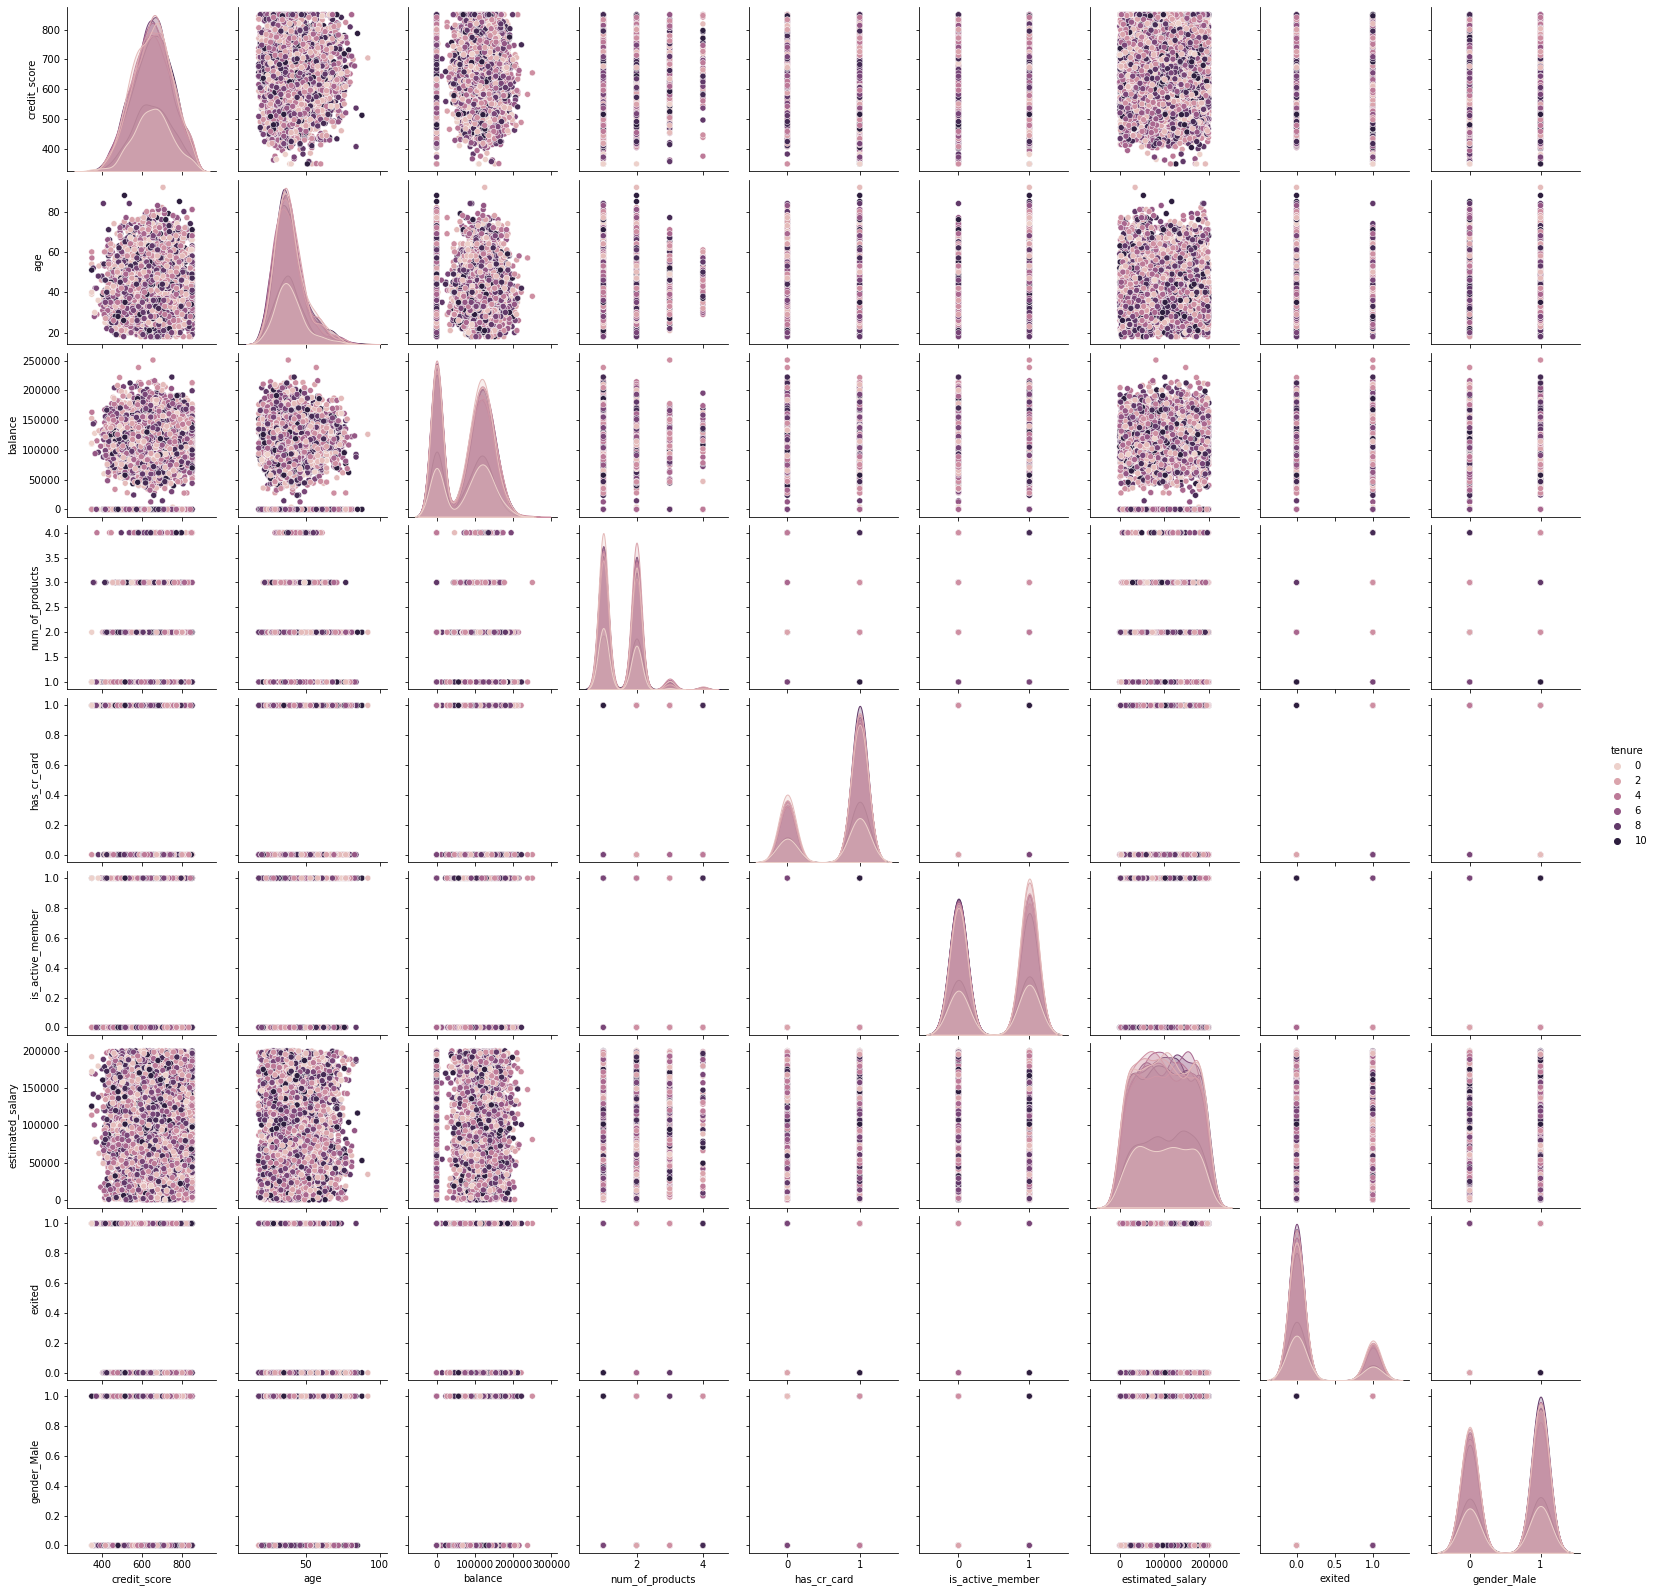

In [28]:
sns.pairplot(data_reg.drop(['geography_Germany', 'geography_Spain'], axis=1), hue='tenure');

In [29]:
features_ = data_reg.drop(['exited'], axis=1) 
target_ = data_reg['exited']

features_train_, features_test_, target_train_, target_test_ = train_test_split(
    features_, target_, test_size=0.4, random_state=12345, stratify=target_)  
features_test_, features_valid_, target_test_, target_valid_ = train_test_split(
    features_test_, target_test_, test_size=0.5, random_state=12345, stratify=target_test_) 

In [30]:
numeric_1 = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
           'has_cr_card', 'is_active_member', 'estimated_salary']

scaler = StandardScaler()
features_train_.loc[:, numeric_1] = scaler.fit_transform(features_train_.loc[:, numeric_1])
features_valid_.loc[:, numeric_1] = scaler.transform(features_valid_.loc[:, numeric_1])
features_test_.loc[:, numeric_1] = scaler.transform(features_test_.loc[:, numeric_1])

## Problem research

### Logistic regression model (no balancing)

In [79]:
model = LogisticRegression(random_state=12345)
print('Accuracy:', np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='accuracy')))
print('f1-measure:', np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1')))

Accuracy: 0.8069305998200456
f1-measure: 0.27466278000849037


### Random forest model (no balancing)

In [78]:
%%time
best_model = None
best_accuracy = 0
best_estimators = 0
best_depth = 0
best_f1 = 0
for n in range(1, 100, 10):
    for depth in range(1, 100, 10):
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345) 
        accuracy_result = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='accuracy'))
        f1 = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1'))
        if f1 >  best_f1:
            best_model = model 
            best_accuracy = accuracy_result 
            best_depth = depth 
            best_f1 = f1
            best_estimators = n          
print("Depth of the best model:", best_depth)
print("Number of trees:", best_estimators)
print("Accuracy best model:", best_accuracy)
print("F1 best model:", best_f1)

Depth of the best model: 31
Number of trees: 71
Accuracy best model: 0.858270251179374
F1 best model: 0.5740250473996613
Wall time: 2min 33s


**Conclusion:** Random forest with F1-measure = 0.57 and accuracy = 0.85 proved to be the most effective model

## Fighting imbalance (Class balancing method via the class_weight parameter)

### Logistic Regression Model

In [77]:
%%time
best_model = 0
best_accuracy = 0
best_f1 = 0
for c in np.arange(0.1, 10, 0.1):
    model = LogisticRegression(random_state=12345, class_weight='balanced', solver="liblinear", C=c)
    accuracy_result = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='accuracy'))
    f1 = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1'))
    if f1 > best_f1:
        best_model = model 
        best_f1 = f1 
        best_accuracy = accuracy_result 
print(best_model)
print("Accuracy best model:", best_accuracy)
print("F1 best model:", best_f1)

LogisticRegression(C=0.1, class_weight='balanced', random_state=12345,
                   solver='liblinear')
Accuracy best model: 0.7066384682010444
F1 best model: 0.4878244938547227
Wall time: 6.14 s


### Random forest model

In [76]:
%%time
best_model_rfc = None
best_accuracy = 0
best_estimators = 0
best_depth = 0
best_f1 = 0
for n in range(1, 100, 10):
    for depth in range(1, 100, 10):
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345, class_weight='balanced')
        accuracy_result = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='accuracy'))
        f1 = np.mean(cross_val_score(model, features_train_, target_train_, cv=5, scoring='f1'))
        if f1 > best_f1:
            best_model_rfc = model
            best_accuracy = accuracy_result 
            best_estimators = n 
            best_f1 = f1 
            best_depth = depth
print("Depth of the best model:", best_depth)         
print("Number of trees:", best_estimators)              
print("Accuracy of the best model:", best_accuracy)
print("F1 of the best model:", best_f1)

Depth of the best model: 11
Number of trees: 61
Accuracy of the best model: 0.8483702352021124
F1 of the best model: 0.5960713313491292
Wall time: 2min 31s


## Class balancing method through upsampling

In [54]:
def upsample(features, target):   # balance function
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat_features = math.ceil(len(features_zeros) / len(features_ones))
    repeat_target = math.ceil(len(target_zeros) / len(target_ones))

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat_features)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat_target)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train_, target_train_)

### Logistic Regression Model

In [74]:
model = LogisticRegression(random_state=12345)
print('f1-measure:', np.mean(cross_val_score(model, features_train_upsampled, target_train_upsampled, cv=5, scoring='f1')))
print('Accuracy:', np.mean(cross_val_score(model, features_train_upsampled, target_train_upsampled, cv=5, scoring='accuracy')))

f1-measure: 0.7046330368994734
Accuracy: 0.7020477815699658


### Random forest model

In [80]:
%%time
best_model = None
best_accuracy = 0
best_estimators = 0
best_depth = 0
best_f1 = 0
for n in range(1, 100, 10):
    for depth in range(1, 100, 10):
        model = RandomForestClassifier(n_estimators=n, max_depth= depth, random_state=12345)
        f1 = np.mean(cross_val_score(model, features_train_upsampled, target_train_upsampled, cv=5, scoring='f1'))
        accuracy_result = np.mean(cross_val_score(model, features_train_upsampled, target_train_upsampled, cv=5, scoring='accuracy'))
        if f1 > best_f1:
            best_model = model
            best_accuracy = accuracy_result 
            best_estimators = n 
            best_f1 = f1 
            best_depth = depth 
print("Depth of the best model:", best_depth)            
print("Number of trees:", best_estimators)              
print("Accuracy of the best model:", best_accuracy)
print("F1 of the best model:", best_f1)

Depth of the best model: 31
Number of trees: 91
Accuracy of the best model: 0.9538111490329919
F1 of the best model: 0.9562875430755537
Wall time: 3min 31s


## Class balancing method through downsampling

In [58]:
def downsample(features, target):   # balance function
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    rat_features = math.ceil(len(features_ones) / len(features_zeros))
    rat_target = math.ceil(len(target_ones) / len(target_zeros))
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=rat_features, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=rat_target, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_, target_train_)

### Модель логистической регрессии

In [82]:
model = LogisticRegression(random_state=12345)
print('Accuracy:', np.mean(cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='accuracy')))
print('f1-мера:', np.mean(cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='f1')))

Accuracy: 0.8058332142046266
f1-мера: 0.2727467548318995


### Модель случайного леса

In [83]:
%%time
best_model = None
best_accuracy = 0
best_estimators = 0
best_f1 = 0
best_depth  = 0
for n in range(1, 100, 10):
    for depth in range(1, 100, 10):
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345)
        accuracy_result = np.mean(cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='accuracy'))
        f1 = np.mean(cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='f1'))
        if f1 > best_f1:
            best_model = model
            best_accuracy = accuracy_result 
            best_estimators = n 
            best_f1 = f1 
            best_depth = depth 
print("Depth of the best model:", best_depth)              
print("Number of trees:", best_estimators)              
print("Accuracy of the best model:", best_accuracy)
print("F1 of the best model:", best_f1)

Depth of the best model: 31
Number of trees: 61
Accuracy of the best model: 0.8602855725325643
F1 of the best model: 0.578536951701003
Wall time: 2min 32s


**Conclusion:** The class weighting method proved to be the best. F1 of the best model: 0.617

### Random Forest Model with GridSearchCV

In [99]:
%%time
model_rfc = RandomForestClassifier(class_weight='balanced')
parametrs = { 'n_estimators': range (1, 100, 10),  
             'max_depth': range (1, 100, 10),   
             'min_samples_leaf': range (1, 8, 2),   
             'min_samples_split': range (2, 10, 2) } 

grid = GridSearchCV(model_rfc, parametrs, cv=5, n_jobs=-1)
grid.fit(features_train_, target_train_)

Wall time: 2min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 100, 10),
                         'min_samples_leaf': range(1, 8, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(1, 100, 10)})

In [100]:
grid.best_params_

{'max_depth': 91,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 81}

In [103]:
model_rfc = RandomForestClassifier(max_depth=91, 
                                   min_samples_leaf=1, 
                                   min_samples_split=4,
                                   n_estimators=81,
                                   class_weight='balanced')

In [104]:
print("Accuracy:", np.mean(cross_val_score(model_rfc, features_train_, target_train_, cv=5, scoring='accuracy')))
print("F1-measure:", np.mean(cross_val_score(model_rfc, features_train_, target_train_, cv=5, scoring='f1')))

Accuracy: 0.8535033089750167
F1-measure: 0.567550502305882


### Random Forest Model with RandomizedSearchCV

In [95]:
%%time
model_rscv = RandomForestClassifier(class_weight='balanced')
param_dict = { 'n_estimators': range (100, 1000, 10), 
              'max_depth': range (1, 100, 10),   
              'min_samples_leaf': range (1, 8, 2),    
              'min_samples_split': range (2, 10, 2), 
              'bootstrap': [True, False],
              'max_features': ['log2', 'sqrt']} 

rand_search = RandomizedSearchCV(model_rscv, param_dict, cv=5, n_jobs=-1, n_iter=100,  random_state=0)

rand_search.fit(features_train_, target_train_)
rand_search.best_params_

Wall time: 2min 15s


{'n_estimators': 950,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 61,
 'bootstrap': True}

In [96]:
model_rfc = RandomForestClassifier(n_estimators=950,
                                   min_samples_split=4,
                                   min_samples_leaf=1,
                                   max_features='log2',
                                   max_depth=61,
                                   bootstrap=True,
                                   class_weight='balanced')

In [98]:
print("Accuracy:", np.mean(cross_val_score(model_rfc, features_train_, target_train_, cv=5, scoring='accuracy')))
print("F1-measure:", np.mean(cross_val_score(model_rfc, features_train_, target_train_, cv=5, scoring='f1')))

Accuracy: 0.8558866118954919
F1-measure: 0.5717065552166742


**Conclusion:**

The best model turned out to be a random forest with the upsampling method. F1-measure=0.95, accuracy=0.95

## Model testing

Testing the Best Random Forest Model

In [105]:
%%time
best_model_rfc = RandomForestClassifier(n_estimators=91, max_depth= 31, random_state=12345)
best_model_rfc.fit(features_train_upsampled, target_train_upsampled)
predictions_test_ = best_model_rfc.predict(features_test_)
accuracy_result = best_model_rfc.score(features_test_, target_test_)
f1 = f1_score(target_test_, predictions_test_)   
              
print("Accuracy of the best model:", accuracy_result)
print("F1 of the best model:", f1)

Accuracy of the best model: 0.8597359735973598
F1 of the best model: 0.6309696092619392
Wall time: 576 ms


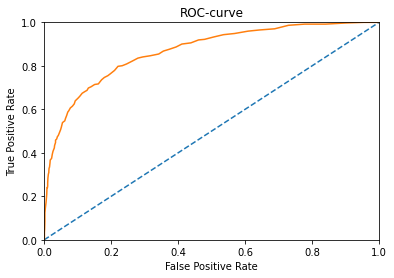

0.8667584387812315

In [106]:
probabilities_test = best_model_rfc.predict_proba(features_test_)
predictions_test_one = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test_, predictions_test_one)
auc_roc = roc_auc_score(target_test_ , predictions_test_one)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()
display(auc_roc)

**Final conclusion:** The Bank Churn project focused on two models: a logistic regression model and a random forest model. The random forest model showed itself to be the best both in the selection of parameters and in the test sample.
The main quality metrics of a random forest model on a test set:
- Accuracy of the best model: 0.859 - the proportion of correct answers predicted by the model
- F1 of the best model: 0.630 - harmonic mean (positive class forecast quality)
- Auc_roc was 0.866 - the proportion of correct answers of the model (or the area under the curve)

On the graph, the ROC curve clearly shows how much the curve of our model rises above the "curve" of the random model (the dotted line on the graph shows the predictions of the random model). The difference between their areas is 0.86-0.5= 0.36. Our model is 36% more efficient than the random one and gives the correct result in 86% of cases.